# Analyze Olympic Games Data With Pandas

Hey Pythonistas,

A new week, a new Python code challenge!

This week you can use Python, Pandas and all the libraries you need to analyze the data of Olympic Games and find out interesting things and present them to everyone with Matpolib, Seaborn and/or Plotly.

## The Challenge

### Basic/ required

Analyse statistics of Olympic Games in a CSV file that you can find [on Kaggle](https://www.kaggle.com/the-guardian/olympic-games).

1. Find out the (male and female) athlete who won most medals in all the Summer Olympic Games (1896-2014). The answer will be Michael Phelps for the men and Larisa Latynina for the women.
2. Display the first 10 countries that won most medals:
    * The order for men will be: USA, Russia (considering that before was USSR), UK,France, Italy, Sweden , Germany, Hungary, Australia, Japan.
    * The order for women will be: USA, Russia, China, Australia, Germany(it would be third if we sum the results with the German Democratic Republic), Netherlands, Romania, UK, Japan, Hungary.
3. Use matplotlib to build line plots of the 10 most awarded countries for time span 1896-2014. Use the 10 most popular summer Olympics disciplines where most popular you can define yourself.

One requirement: use [pandas](https://pandas.pydata.org/) to create a dataframe you can work on.

For the data visualization part, you can try [matplotlib](https://matplotlib.org/) or [Seaborn](https://seaborn.pydata.org/) if you want to try a heatmap and different kind of visualizatios. You can install [Jupyter](http://jupyter.org/) ([Anaconda](https://www.anaconda.com/)) to work in an interactive notebook.

### Don't be shy

Create a barplot which shows the total medals won for each sport during the summer Olympics.

### Bonus

To take this even further you could create a map and choose colors for each Country, pointing out the ones which won most medals. To get started on this, you can try [plotly](https://plot.ly/) library, and specifically [Choropleth Maps in Python](https://plot.ly/python/choropleth-maps/).

#### Import dependecies

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

#### Import dictyionary file

In [2]:
country_dict = pd.read_csv("data/dictionary.csv", usecols=[0, 1])
country_dict.set_index("Code", inplace=True)
country_dict.head()

,Country
Code,
AFG,Afghanistan
ALB,Albania
ALG,Algeria
ASA,American Samoa*
AND,Andorra


#### Import the summer data into a dataframe

In [3]:
df = pd.read_csv("data/summer.csv")
df.replace(["GDR", "URS"], ["GER", "RUS"], inplace=True)
df.replace(country_dict.index, country_dict["Country"], inplace=True)
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",Hungary,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",Austria,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",Greece,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",Greece,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",Greece,Men,100M Freestyle For Sailors,Silver


In [4]:
males = df[df["Gender"] == "Men"].set_index("Year").copy()
females = df[df["Gender"] == "Women"].set_index("Year").copy()

#### Top Male and Female

In [5]:
lname, fname = males["Athlete"].value_counts().idxmax().split(", ")
top_male_athlete = f"{fname} {lname.title()}"
top_male_athlete

'Michael Phelps'

In [6]:
lname, fname = females["Athlete"].value_counts().idxmax().split(", ")
top_female_athlete = f"{fname} {lname.title()}"
top_female_athlete

'Larisa Latynina'

#### Top 10 Countries that won the most medals

##### Male

In [7]:
top_10_countries_male = list(males["Country"].value_counts().head(10).index)
top_10_countries_male

['United States',
 'Russia',
 'United Kingdom',
 'Germany',
 'France',
 'Italy',
 'Sweden',
 'Hungary',
 'Australia',
 'Japan']

#### Female

In [8]:
top_10_countries_female = list(females["Country"].value_counts().head(10).index)
top_10_countries_female

['United States',
 'Russia',
 'Germany',
 'China',
 'Australia',
 'Netherlands',
 'ROU',
 'United Kingdom',
 'Japan',
 'Hungary']

### Prepare Data to be Charted

In [9]:
all_years = list(df["Year"].unique())
idx = pd.MultiIndex.from_product([all_years, ["Gold", "Silver", "Bronze"]], names=["Year", "Medal"])

#### Male

In [10]:
m_col = top_10_countries_male

male_top_10_contries_all_games = pd.DataFrame(0, idx, m_col)

for (country, medal), frame in males.groupby(["Country", "Medal"]):
    for year, data in frame["Medal"].groupby("Year"):
        male_top_10_contries_all_games.loc[year].at[medal, country] = data.count()

print(male_top_10_contries_all_games.loc[2012])

        United States  Russia  United Kingdom  Germany  France  Italy  Sweden  \
Medal                                                                           
Gold               42      23              31       39      26     10       2   
Silver             27       7              18       10      15     21      16   
Bronze             19      34              27       18      10     21       3   

        Hungary  Australia  Japan  
Medal                              
Gold          6         10      3  
Silver        6         12     18  
Bronze        4         27     10  


#### Female

In [11]:
f_col = top_10_countries_female

female_top_10_contries_all_games = pd.DataFrame(0, idx, f_col)

for (country, medal), frame in females.groupby(["Country", "Medal"]):
    for year, data in frame["Medal"].groupby("Year"):
        female_top_10_contries_all_games.loc[year].at[medal, country] = data.count()

print(female_top_10_contries_all_games.loc[2012])

        United States  Russia  Germany  China  Australia  Netherlands  ROU  \
Medal                                                                        
Gold              105      24        6     29          9           19    1   
Silver             30      25       18     34         24            7    4   
Bronze             27      17        3     13         32           16    5   

        United Kingdom  Japan  Hungary  
Medal                                   
Gold                17      4        6  
Silver              12     26        2  
Bronze              21     23        2  


### Create Line Graphs for 2012

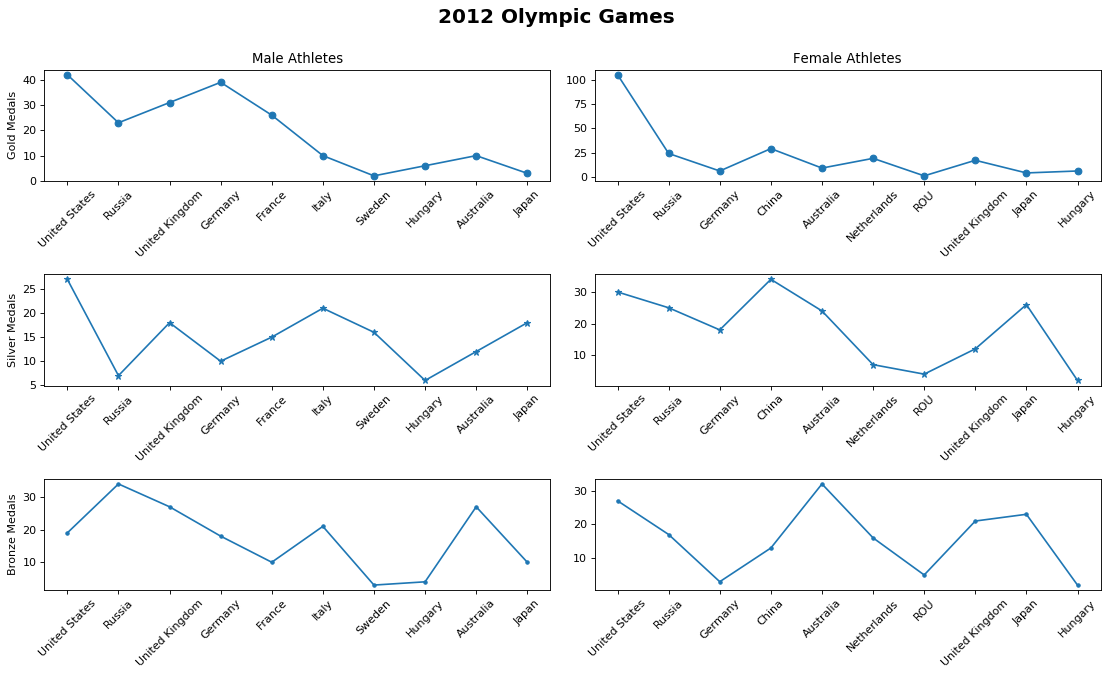

In [12]:
figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')

m = male_top_10_contries_all_games.columns
f = female_top_10_contries_all_games.columns

m1 = male_top_10_contries_all_games.loc[2012, "Gold"]
m2 = male_top_10_contries_all_games.loc[2012, "Silver"]
m3 = male_top_10_contries_all_games.loc[2012, "Bronze"]
f1 = female_top_10_contries_all_games.loc[2012, "Gold"]
f2 = female_top_10_contries_all_games.loc[2012, "Silver"]
f3 = female_top_10_contries_all_games.loc[2012, "Bronze"]

plt.subplot(3, 2, 1)
plt.plot(m, m1, 'o-')
plt.title("Male Athletes")
plt.ylabel('Gold Medals')
plt.xticks(rotation=45)

plt.subplot(3, 2, 2)
plt.plot(f, f1, 'o-')
plt.title("Female Athletes")
plt.xticks(rotation=45)

plt.subplot(3, 2, 3)
plt.plot(m, m2, '*-')
plt.ylabel("Silver Medals")
plt.xticks(rotation=45)

plt.subplot(3, 2, 4)
plt.plot(f, f2, '*-')
plt.xticks(rotation=45)

plt.subplot(3, 2, 5)
plt.plot(m, m3, '.-')
plt.ylabel("Bronze Medals")
plt.xticks(rotation=45)

plt.subplot(3, 2, 6)
plt.plot(f, f3, '.-')
plt.xticks(rotation=45)

plt.suptitle('2012 Olympic Games', size=18, weight="bold", y=1.05)
plt.tight_layout()

plt.show()